# Task
Implement the Ordinary Least Squares (OLS) algorithm to calculate the optimal slope (m) and y-intercept (b) for the line of best fit using the loaded housing data.

In [ ]:
!git clone https://github.com/muditajalan/Winter-projects-25-26.git



Cloning into 'Winter-projects-25-26'...
remote: Enumerating objects: 358, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 358 (delta 100), reused 50 (delta 50), pack-reused 250 (from 3)
Receiving objects: 100% (358/358), 22.26 MiB | 25.41 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [ ]:
%cd "Winter-projects-25-26/GNN Learning Path & Fraud Detection System/Assignment_1"




/content/Winter-projects-25-26/GNN Learning Path & Fraud Detection System/Assignment_1/Winter-projects-25-26/GNN Learning Path & Fraud Detection System/Assignment_1


In [ ]:
!mkdir -p "Mudita Jalan 240665"

In [ ]:
from google.colab import files
uploaded = files.upload()
# uploaded is a dict of filename -> data; files will appear in /content


## Load Housing Data

### Subtask:
Load the housing data from the user-provided path `/content/drive/MyDrive/Colab Notebooks/housing_prices - housing_prices.csv` into Python lists for square footage (x) and price (y) using a pure Python implementation (without pandas).


In [ ]:
import csv

X = []
Y = []

with open('/content/drive/MyDrive/Colab Notebooks/housing_prices - housing_prices.csv', 'r') as file:
    reader = csv.reader(file)
    header = next(reader)  # Skip the header row
    for row in reader:
        # Assuming 'SquareFootage' is the first column and 'Price' is the second
        # Based on the previous debugging output: ['SquareFootage', 'Price']
        X.append(int(row[0]))
        Y.append(int(row[1]))

print(f"First 5 entries of X (SquareFootage): {X[:5]}")
print(f"First 5 entries of Y (Price): {Y[:5]}")
print(f"Total number of entries: {len(X)}")

First 5 entries of X (SquareFootage): [1100, 1400, 1425, 1550, 1600]
First 5 entries of Y (Price): [199000, 245000, 230000, 215000, 280000]
Total number of entries: 21


# Task
Implement and compare Ordinary Least Squares (OLS) and Gradient Descent algorithms for linear regression using the housing data from `/content/drive/MyDrive/Colab Notebooks/housing_prices - housing_prices.csv`. This involves loading the data into Python lists, mathematically deriving and implementing both algorithms to find the optimal slope and y-intercept, predicting the price for a 2,500 square foot house using both methods, visualizing the data points with both best-fit lines, and summarizing the predicted prices with a brief comparison.

## Implement OLS Algorithm

### Subtask:
Create a function to implement the Ordinary Least Squares (OLS) method to find the optimal slope (m) and y-intercept (b) for the line of best fit.


**Reasoning**:
I need to implement the `ols_regression` function as described in the instructions, which involves calculating the means of X and Y, then computing the slope (m) and y-intercept (b) using the OLS formulas. Finally, I will call this function with the loaded data and print the results.



In [ ]:
def ols_regression(X, Y):
    n = len(X)
    mean_x = sum(X) / n
    mean_y = sum(Y) / n

    numerator = sum([(X[i] - mean_x) * (Y[i] - mean_y) for i in range(n)])
    denominator = sum([(X[i] - mean_x)**2 for i in range(n)])

    # Check for division by zero in case all X values are the same
    if denominator == 0:
        m = 0
    else:
        m = numerator / denominator

    b = mean_y - m * mean_x

    return m, b

# Call the function with the loaded data
m, b = ols_regression(X, Y)

print(f"Optimal Slope (m): {m}")
print(f"Optimal Y-intercept (b): {b}")

Optimal Slope (m): 171.1732732937618
Optimal Y-intercept (b): 1627.3680380250444


## Implement Gradient Descent Algorithm

### Subtask:
Create a function to implement the Gradient Descent algorithm to find the optimal slope (m) and y-intercept (b) for the line of best fit. Define the learning rate and number of iterations.


**Reasoning**:
I need to implement the `gradient_descent` function as specified, including initializing parameters, iterating to calculate predictions, errors, gradients, and updating the slope and intercept. Then, I will call this function with appropriate learning rate and iterations and print the results.



In [ ]:
def gradient_descent(X, Y, learning_rate, num_iterations):
    m = 0
    b = 0
    n = len(X)

    for _ in range(num_iterations):
        y_pred = [m * X[i] + b for i in range(n)]

        # Calculate the error
        error = [y_pred[i] - Y[i] for i in range(n)]

        # Calculate gradients
        dm = (2 / n) * sum([error[i] * X[i] for i in range(n)])
        db = (2 / n) * sum(error)

        # Update m and b
        m = m - learning_rate * dm
        b = b - learning_rate * db

    return m, b

# Define learning rate and number of iterations
learning_rate = 1e-7 # A small learning rate is often needed for GD with features like square footage
num_iterations = 100000 # Increase iterations for better convergence

# Call the function with the loaded data
m_gd, b_gd = gradient_descent(X, Y, learning_rate, num_iterations)

print(f"Optimal Slope (m) from Gradient Descent: {m_gd}")
print(f"Optimal Y-intercept (b) from Gradient Descent: {b_gd}")

Optimal Slope (m) from Gradient Descent: 171.8685485600341
Optimal Y-intercept (b) from Gradient Descent: 2.477639564478913


## Predict and Compare Prices

### Subtask:
Predict the price for a house with 2,500 square feet using both the OLS and Gradient Descent models. Format the predicted prices to two decimal places and display them.


**Reasoning**:
I need to define the square footage for prediction, calculate the predicted prices using both OLS and Gradient Descent models with their respective parameters, and then print these predictions formatted to two decimal places.



In [ ]:
square_footage_to_predict = 2500

# Predict using OLS model
predicted_price_ols = m * square_footage_to_predict + b

# Predict using Gradient Descent model
predicted_price_gd = m_gd * square_footage_to_predict + b_gd

print(f"Predicted price for 2,500 sq ft (OLS): ${predicted_price_ols:.2f}")
print(f"Predicted price for 2,500 sq ft (Gradient Descent): ${predicted_price_gd:.2f}")

Predicted price for 2,500 sq ft (OLS): $429560.55
Predicted price for 2,500 sq ft (Gradient Descent): $429673.85


## Visualize Best Fit Lines

### Subtask:
Generate a plot showing the original housing data points, the OLS best-fit line, and the Gradient Descent best-fit line. Include a legend for all plotted elements. Mark the predicted price for 2,500 sq ft on the plot for both methods.


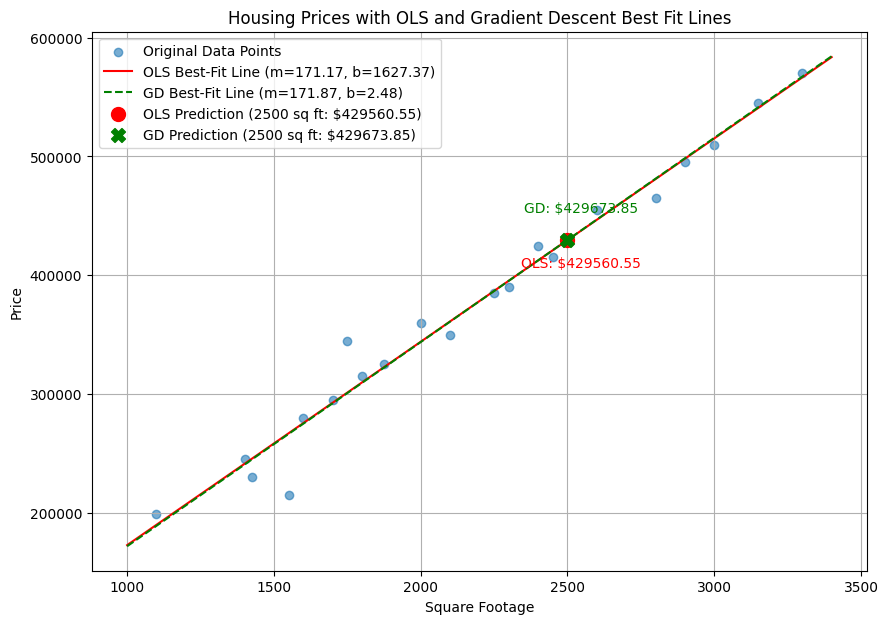

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a scatter plot of the original data points
plt.figure(figsize=(10, 7))
plt.scatter(X, Y, label='Original Data Points', alpha=0.6)

# Generate a range of x-values for plotting the best-fit lines
x_line = np.linspace(min(X) - 100, max(X) + 100, 100)

# Calculate corresponding y-values for OLS best-fit line
y_ols = [m * x + b for x in x_line]

# Calculate corresponding y-values for Gradient Descent best-fit line
y_gd = [m_gd * x + b_gd for x in x_line]

# Plot the OLS best-fit line
plt.plot(x_line, y_ols, color='red', linestyle='-', label=f'OLS Best-Fit Line (m={m:.2f}, b={b:.2f})')

# Plot the Gradient Descent best-fit line
plt.plot(x_line, y_gd, color='green', linestyle='--', label=f'GD Best-Fit Line (m={m_gd:.2f}, b={b_gd:.2f})')

# Mark the predicted price for 2,500 sq ft on the plot for both methods
plt.scatter(square_footage_to_predict, predicted_price_ols, color='red', marker='o', s=100, zorder=5, label=f'OLS Prediction ({square_footage_to_predict} sq ft: ${predicted_price_ols:.2f})')
plt.annotate(f'OLS: ${predicted_price_ols:.2f}',
             (square_footage_to_predict, predicted_price_ols),
             textcoords="offset points", xytext=(10,-20), ha='center', color='red')

plt.scatter(square_footage_to_predict, predicted_price_gd, color='green', marker='X', s=100, zorder=5, label=f'GD Prediction ({square_footage_to_predict} sq ft: ${predicted_price_gd:.2f})')
plt.annotate(f'GD: ${predicted_price_gd:.2f}',
             (square_footage_to_predict, predicted_price_gd),
             textcoords="offset points", xytext=(10,20), ha='center', color='green')

# Add labels, title, and legend
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('Housing Prices with OLS and Gradient Descent Best Fit Lines')
plt.legend()
plt.grid(True)
plt.show()

**Reasoning**:
To visualize the data and the regression lines, I need to import the `matplotlib.pyplot` library for plotting and `numpy` for numerical operations like `linspace`. Since `numpy` has not been explicitly imported before, I will import both here.

